## Exploratory Data Analysis of StackOverflow 2018 Developer Survey!

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
stackData = pd.read_csv('data/survey_results_public1.csv')
schema = pd.read_csv('data/survey_results_schema.csv')
stackData.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new opportunities",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stack Overflow,9.0,Deskto

In [12]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [13]:
stackData.shape

(51392, 154)

In [14]:
pd.options.display.max_colwidth = 300

### Check for missing values in the dataset.

In [15]:
totalMissing = stackData.isnull().sum().sort_values(ascending = False)
percentMissing = ((stackData.isnull().sum())/(stackData.isnull().count()) * 100).sort_values(ascending = False)
missingStackData = pd.concat([totalMissing, percentMissing], axis=1, keys=['Total_Missing_Values', 'Percent_Missing_Values'])
missingStackData

,Total_Missing_Values,Percent_Missing_Values
ExCoder10Years,50475,98.215676
ExCoderNotForMe,50471,98.207892
ExCoderWillNotCode,50470,98.205946
ExCoderReturn,50469,98.204001
ExCoderBalance,50469,98.204001
ExCoderBelonged,50464,98.194271
ExCoderActive,50462,98.190380
ExCoderSkills,50457,98.180651
YearsCodedJobPast,50418,98.104763
MobileDeveloperType,49839,96.978129


### Do the developers code as their hobby? 

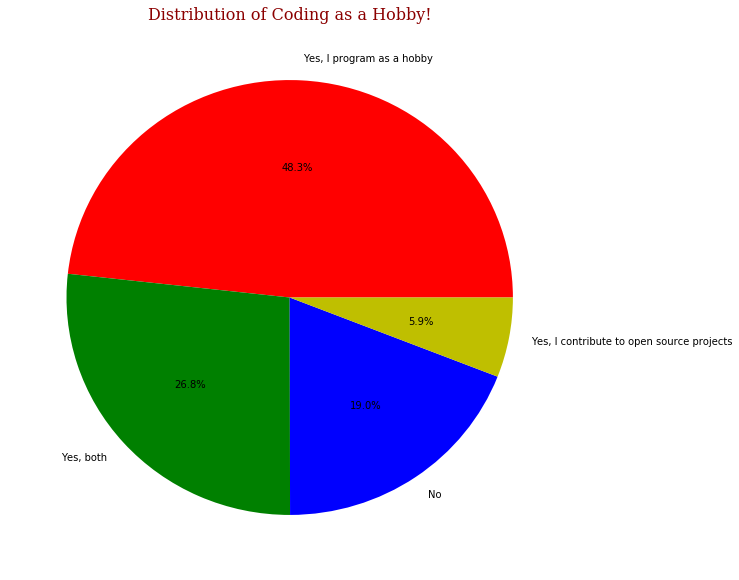

In [17]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

hobbyCoders = stackData['ProgramHobby'].value_counts()
labels = hobbyCoders.index
values = hobbyCoders.values
colors = ['r', 'g', 'b', 'y']

plt.figure(figsize=(10, 10))
plt.title('Distribution of Coding as a Hobby!', fontdict=font)
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show(True)

### Country-wise analysis (Top 20)

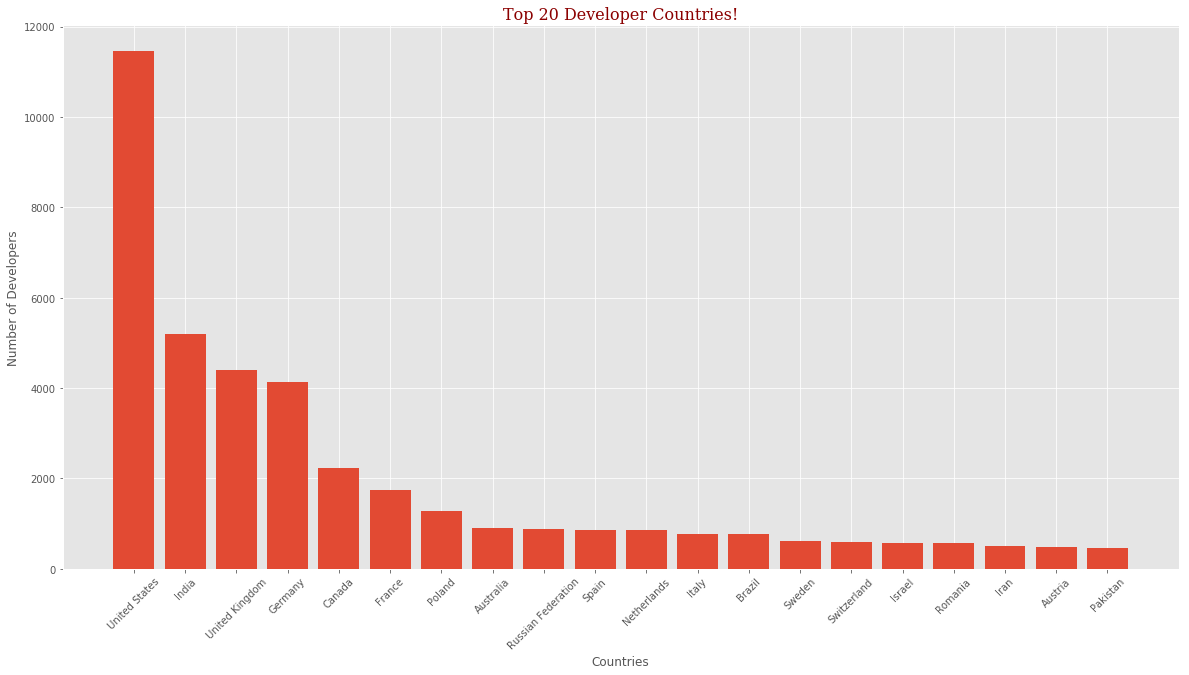

In [18]:
countryData = stackData['Country'].value_counts()[:20]
countries = countryData.index
developers = countryData.values

plt.figure(figsize=(20, 10))
plt.bar(countries, developers)
plt.title('Top 20 Developer Countries!', fontdict=font)
plt.xlabel('Countries')
plt.xticks(rotation=45)
plt.ylabel('Number of Developers')
plt.show(True)

### Profession Distribution of the Coders

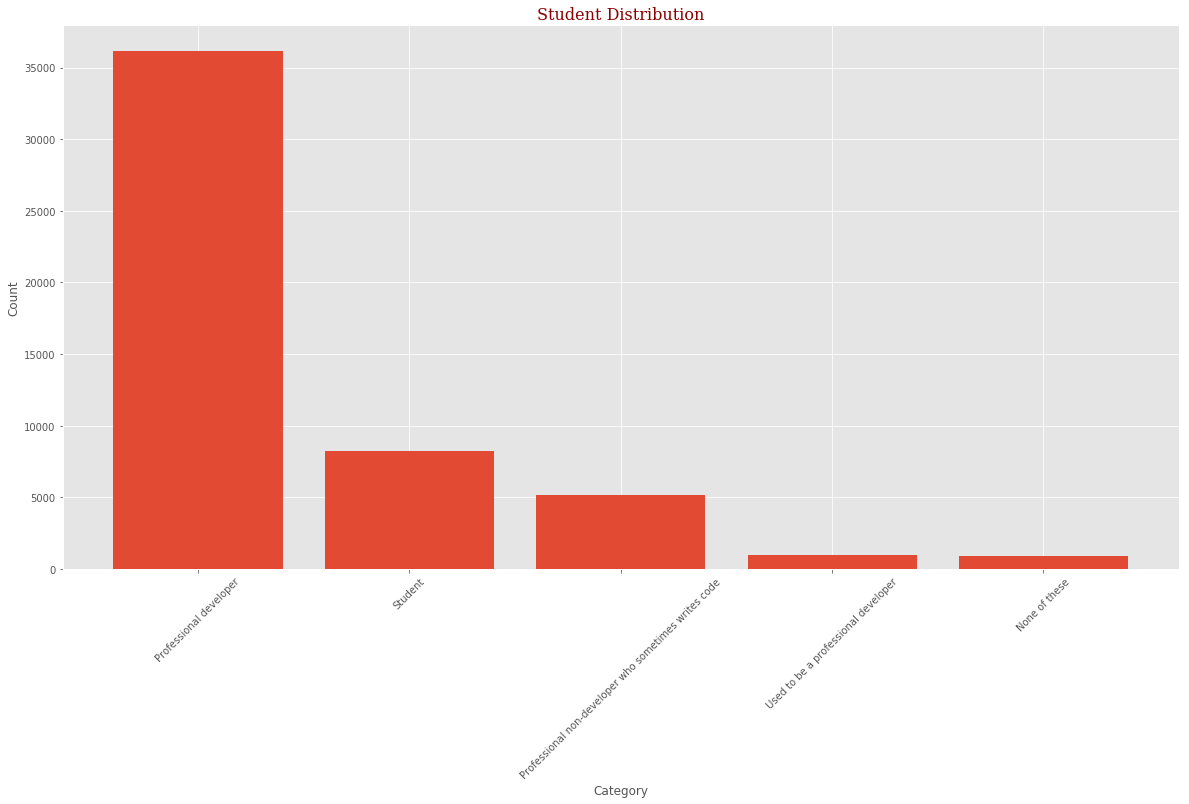

In [21]:
professionData = stackData['Professional'].value_counts()
labels = professionData.index
values = professionData.values

plt.figure(figsize=(20, 10))
plt.title('Student Distribution', fontdict=font)
plt.bar(labels, values)
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show(True)

### Formal Education Distribution

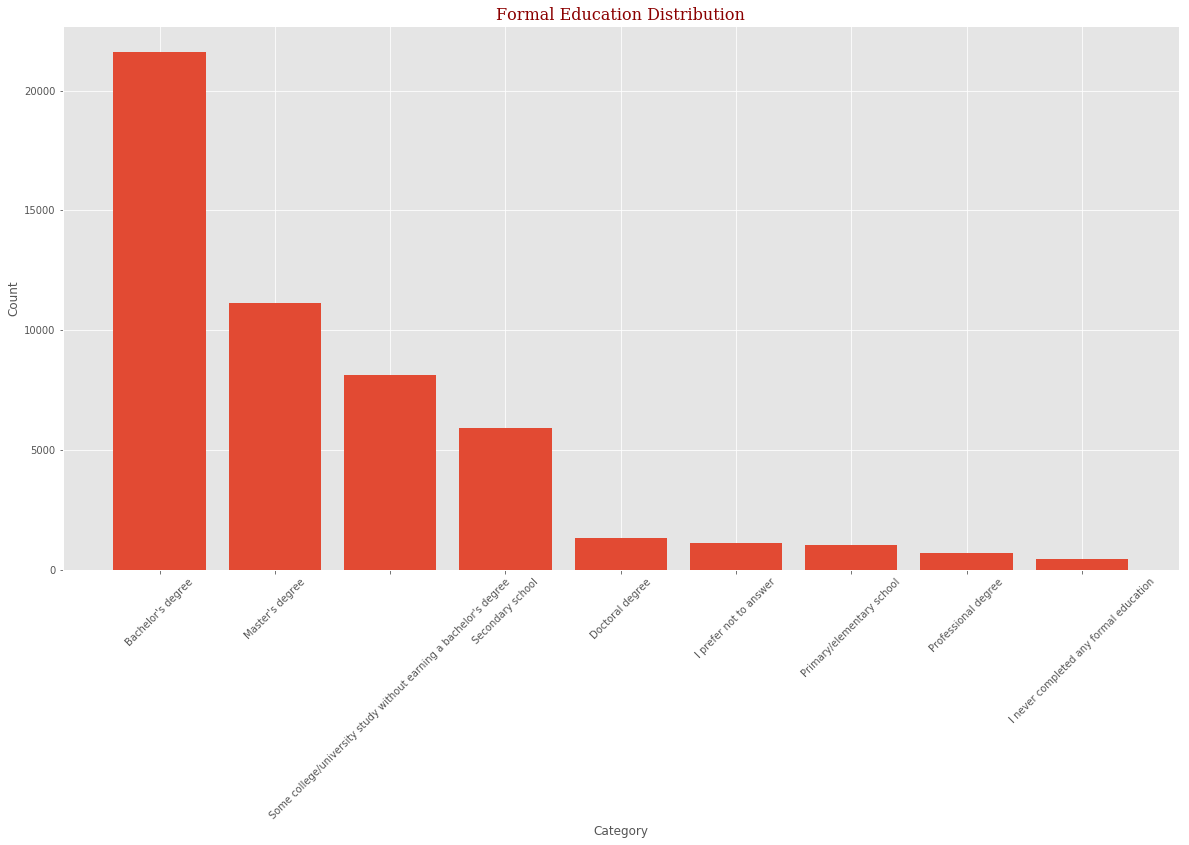

In [22]:
educationData = stackData['FormalEducation'].value_counts()
labels = educationData.index
values = educationData.values

plt.figure(figsize=(20, 10))
plt.title('Formal Education Distribution', fontdict=font)
plt.bar(labels, values)
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show(True)

### Undergraduate students major distibution

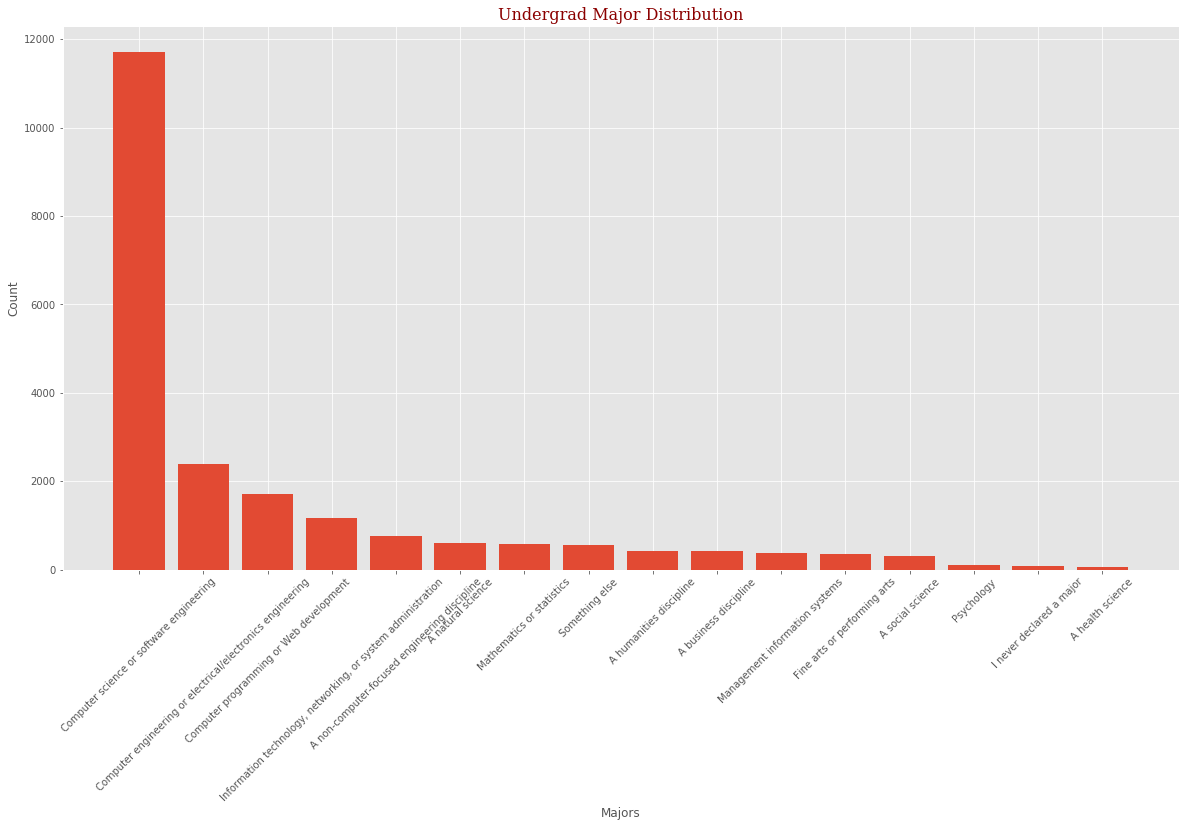

In [25]:
bachelorsMajor = stackData.loc[stackData['FormalEducation'] == 'Bachelor\'s degree', 'MajorUndergrad']
majorData = bachelorsMajor.value_counts()
labels = majorData.index
values = majorData.values

plt.figure(figsize=(20, 10))
plt.title('Undergrad Major Distribution', fontdict=font)
plt.bar(labels, values)
plt.xlabel('Majors')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show(True)

### Lets analyze the salary expectations of the developers

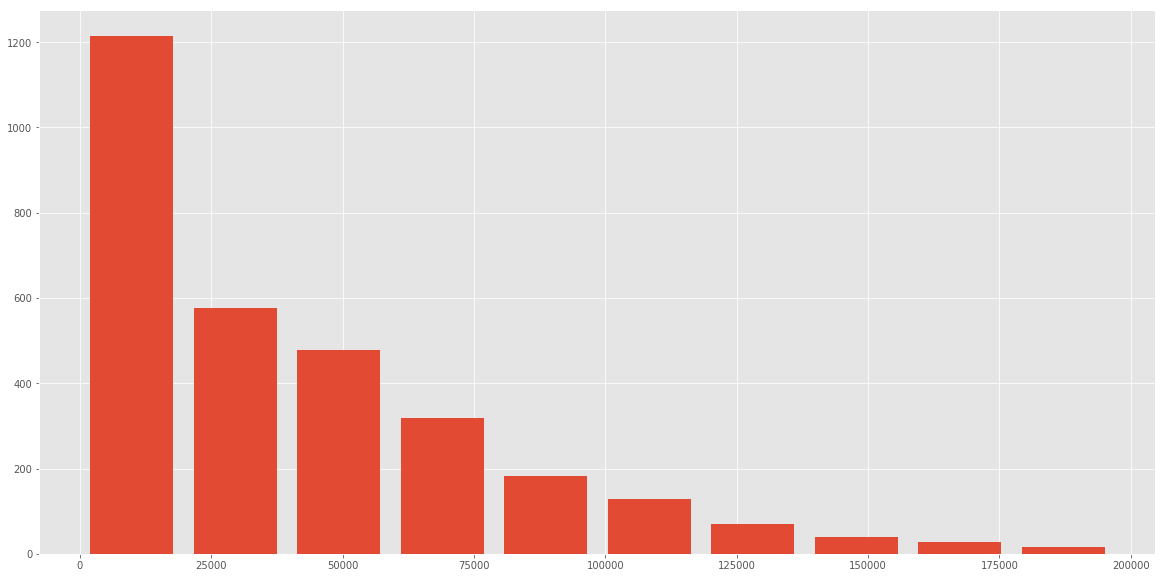

In [27]:
salaryExpectations = pd.DataFrame(stackData['Salary'])
salaryExpectations = salaryExpectations.dropna()
salaryExpectations = salaryExpectations['Salary'].value_counts()
maxSalary = salaryExpectations.index.max() # $187500.0
minSalary = salaryExpectations.index.min() # $0.0

plt.figure(figsize=(20,10))
plt.hist(salaryExpectations.index, histtype='bar', rwidth=0.8)
plt.show(True)

### Median Salary Expectation of Developers with Masters Degree in USA is 90000.0 USD

In [28]:
masterStudents = pd.DataFrame(stackData.loc[(stackData['FormalEducation'] == 'Master\'s degree') & (stackData['Country'] == 'United States'), 'ExpectedSalary'])
masterStudents = masterStudents.dropna()
masterStudents['ExpectedSalary'].median()

90000.0

### How the Developers pronounce 'GIF'

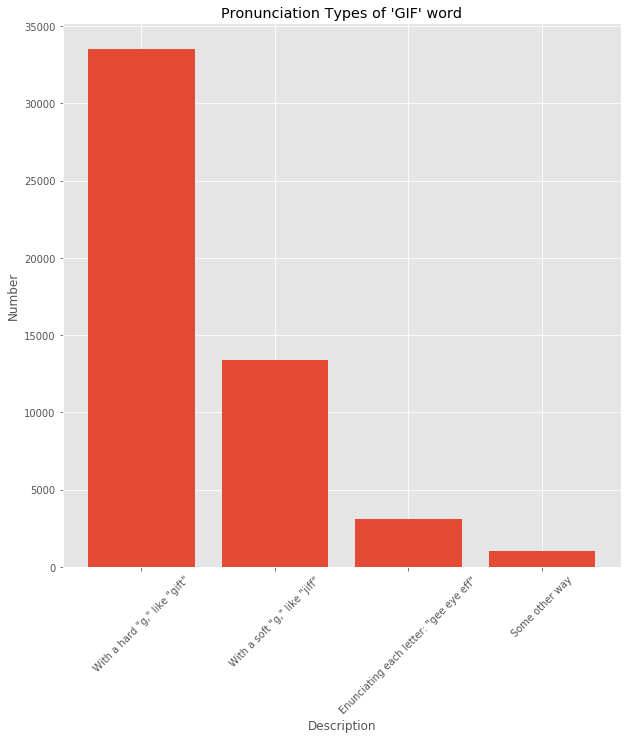

In [29]:
pronounceGIF = stackData['PronounceGIF'].value_counts()

plt.figure(figsize=(10, 10))
plt.title('Pronunciation Types of \'GIF\' word')
plt.xlabel('Description')
plt.ylabel('Number')
plt.xticks(rotation=45)
plt.bar(pronounceGIF.index, pronounceGIF.values)
plt.show(True)

### Developers' favourite sites to maintain resumes

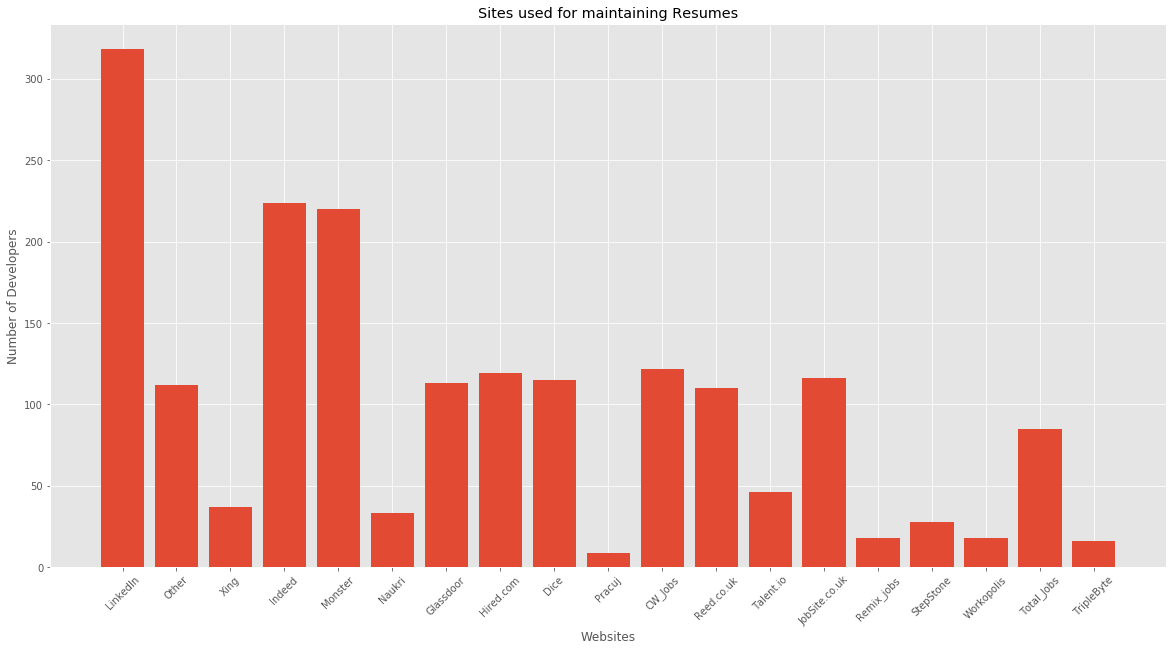

In [30]:
resumeSites = stackData['JobProfile']
resumeSites = resumeSites.dropna().value_counts()

sites = [site.split(';') for site in resumeSites.index if ';' in site]
# 
sites = list(sum(sites, []))
sites = [site.replace(' ', '') for site in sites]
d = {}
for website in sites:
    if website not in d:
        d[website] = 1
    else:
        d[website] += 1
        
labels = d.keys()
values = d.values()

plt.figure(figsize=(20, 10))
plt.title('Sites used for maintaining Resumes')
plt.xlabel('Websites')
plt.ylabel('Number of Developers')
plt.xticks(rotation=45)
plt.bar(labels, values)
plt.show(True)

### Importance of Algorithms and Data Structures in Hiring Process

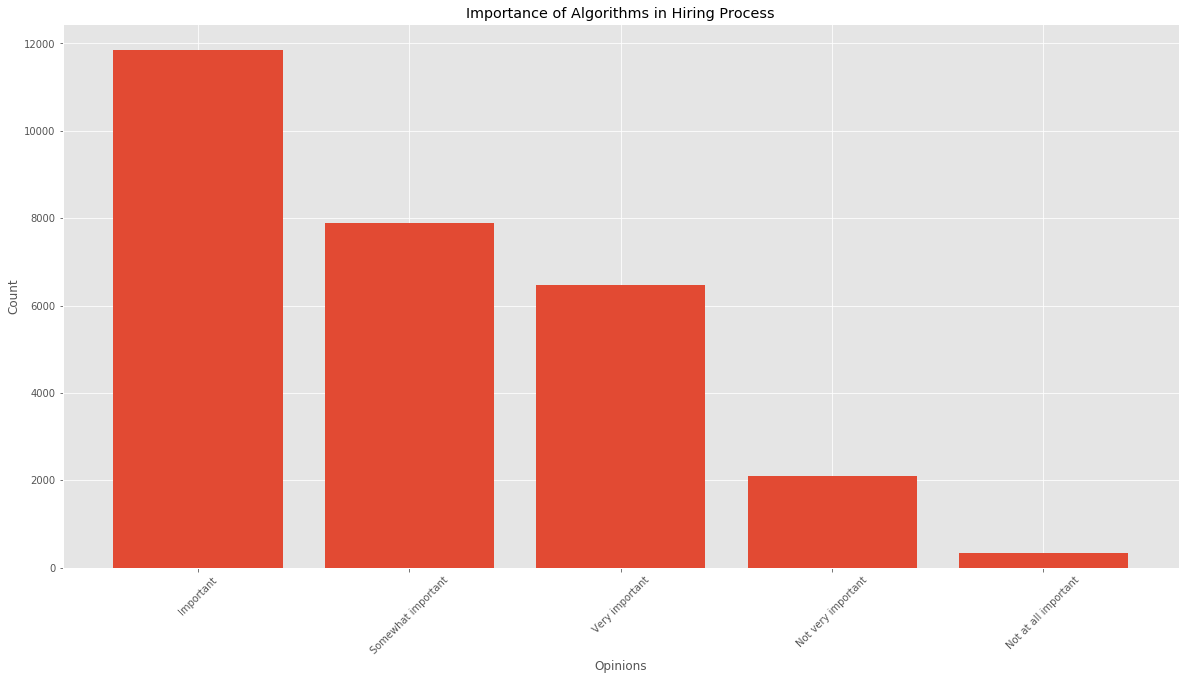

In [31]:
algoImportance = stackData['ImportantHiringAlgorithms'].dropna().value_counts()
labels = algoImportance.index
count = algoImportance.values

plt.figure(figsize=(20, 10))
plt.title('Importance of Algorithms in Hiring Process')
plt.xlabel('Opinions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.bar(labels, count)
plt.show(True)

### Gender Distribution

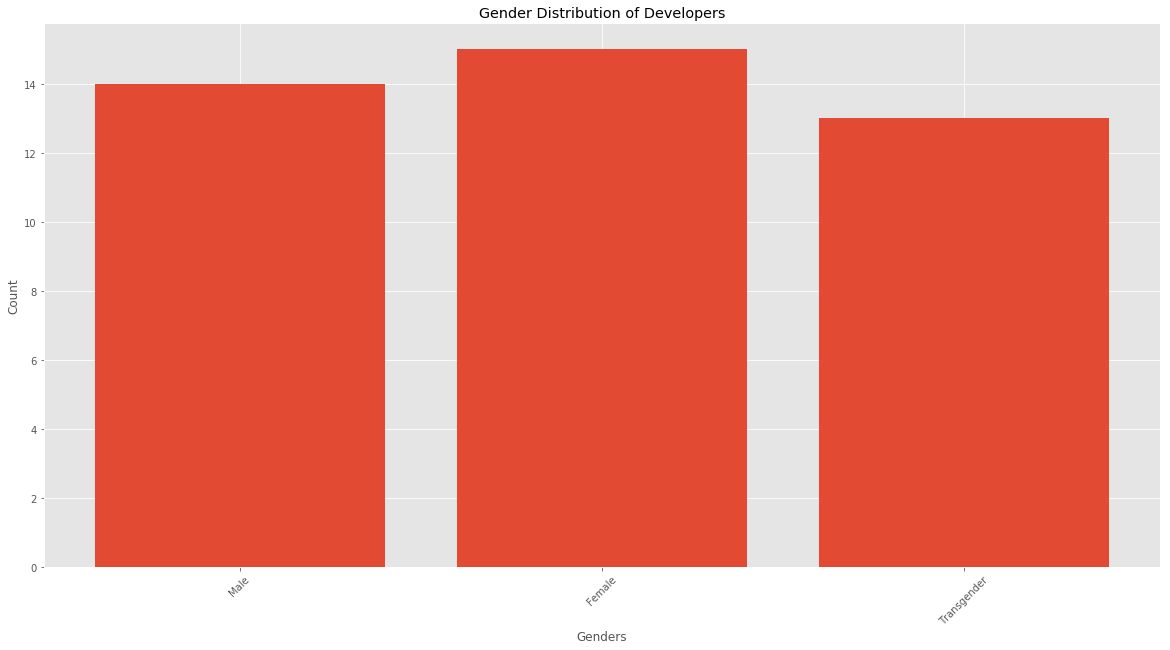

In [32]:
genderData = stackData['Gender'].dropna().value_counts()

genders = [gender.split(';') for gender in genderData.index if ';' in gender]

genders = list(sum(genders, []))

genders = [gender.replace(' ', '') for gender in genders]

d = {}
for gender in genders:
    if gender not in d:
        d[gender] = 1
    else:
        d[gender] += 1
del d['Gendernon-conforming']
del d['Other']

labels = d.keys()
values = d.values()

plt.figure(figsize=(20, 10))
plt.title('Gender Distribution of Developers')
plt.xlabel('Genders')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.bar(labels, values)
plt.show(True)

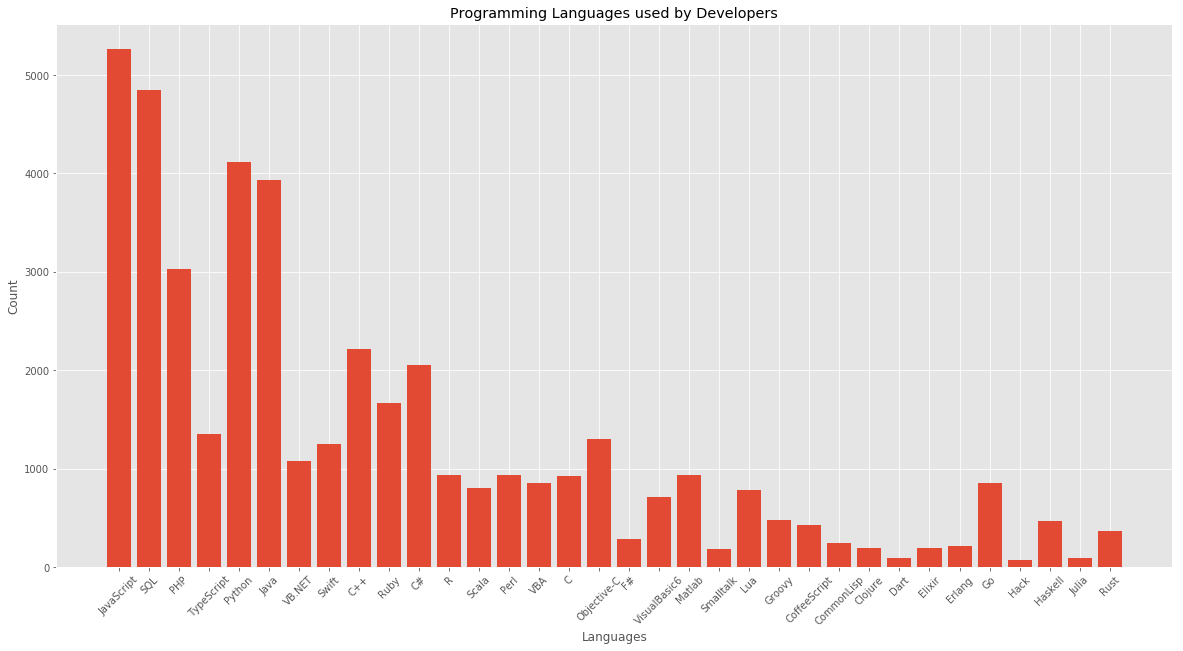

In [33]:
workedLang = stackData['HaveWorkedLanguage'].dropna().value_counts()

languages = [lang.split(';') for lang in workedLang.index if ';' in lang]
languages = list(sum(languages, []))
languages = [lang.replace(' ', '') for lang in languages if ' ' in lang]

d = {}

for lang in languages:
    if lang not in d:
        d[lang] = 1
    else:
        d[lang] += 1
        
labels = d.keys()
values = d.values()

plt.figure(figsize=(20, 10))
plt.title('Programming Languages used by Developers')
plt.xlabel('Languages')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.bar(labels, values)
plt.show(True)

### Which languages developers would like to work with?

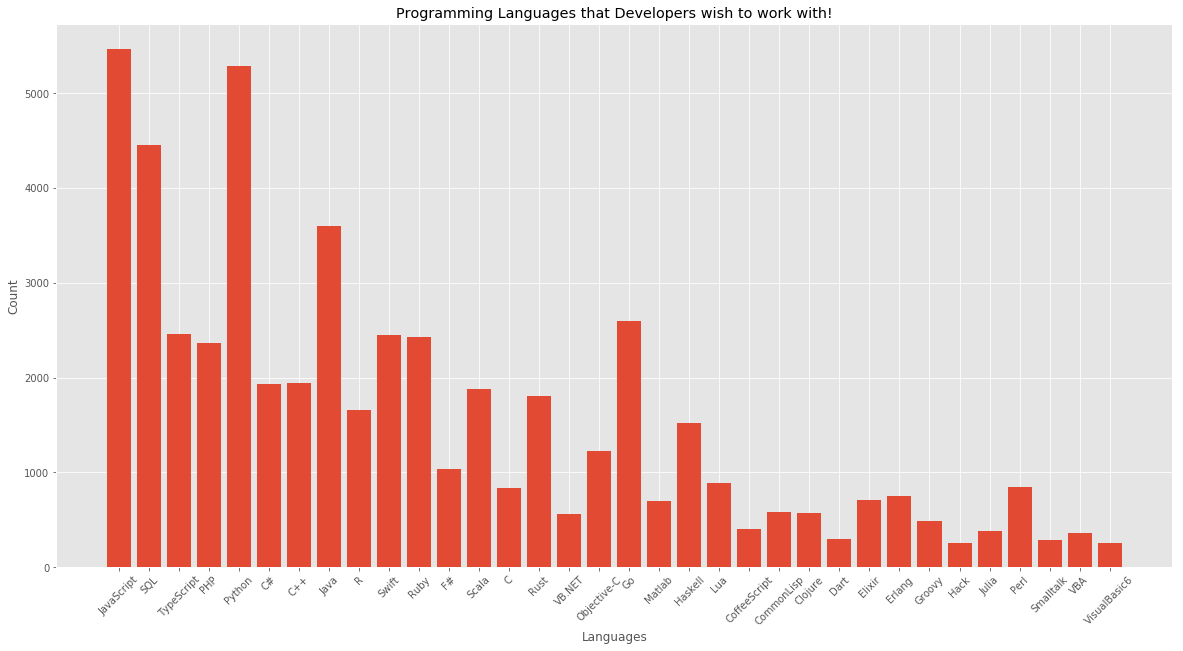

In [34]:
workedLang = stackData['WantWorkLanguage'].dropna().value_counts()

languages = [lang.split(';') for lang in workedLang.index if ';' in lang]
languages = list(sum(languages, []))
languages = [lang.replace(' ', '') for lang in languages if ' ' in lang]

d = {}

for lang in languages:
    if lang not in d:
        d[lang] = 1
    else:
        d[lang] += 1
        
labels = d.keys()
values = d.values()

plt.figure(figsize=(20, 10))
plt.title('Programming Languages that Developers wish to work with!')
plt.xlabel('Languages')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.bar(labels, values)
plt.show(True)

### Most used IDEs

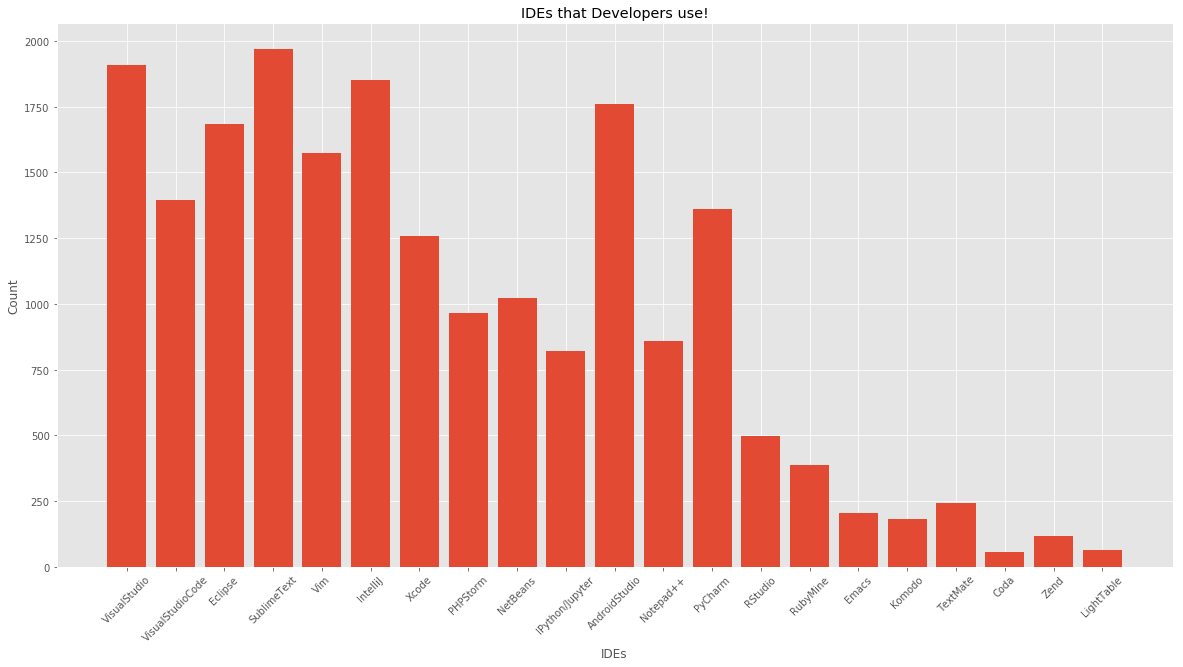

In [35]:
ides = stackData['IDE'].dropna().value_counts()

ides = [ide.split(';') for ide in ides.index if ';' in ide]
ides = list(sum(ides, []))
ides = [ide.replace(' ', '') for ide in ides if ' ' in ide]

d = {}

for ide in ides:
    if ide not in d:
        d[ide] = 1
    else:
        d[ide] += 1
        
labels = d.keys()
values = d.values()

plt.figure(figsize=(20, 10))
plt.title('IDEs that Developers use!')
plt.xlabel('IDEs')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.bar(labels, values)
plt.show(True)

### Ambience required for development

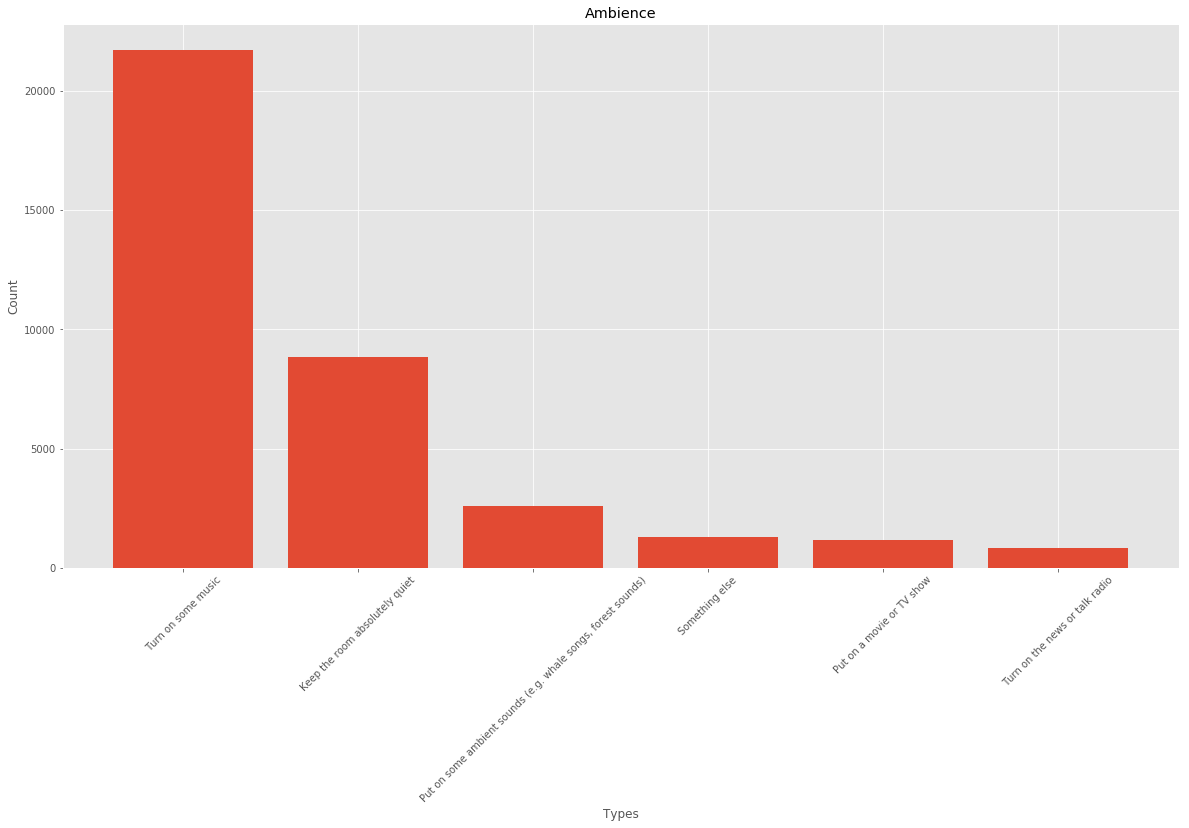

In [36]:
ambience = stackData['AuditoryEnvironment'].dropna().value_counts()
labels = ambience.index
count = ambience.values

plt.figure(figsize=(20, 10))
plt.title('Ambience')
plt.xlabel('Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.bar(labels, count)
plt.show(True)

### Do developers enjoy debugging?

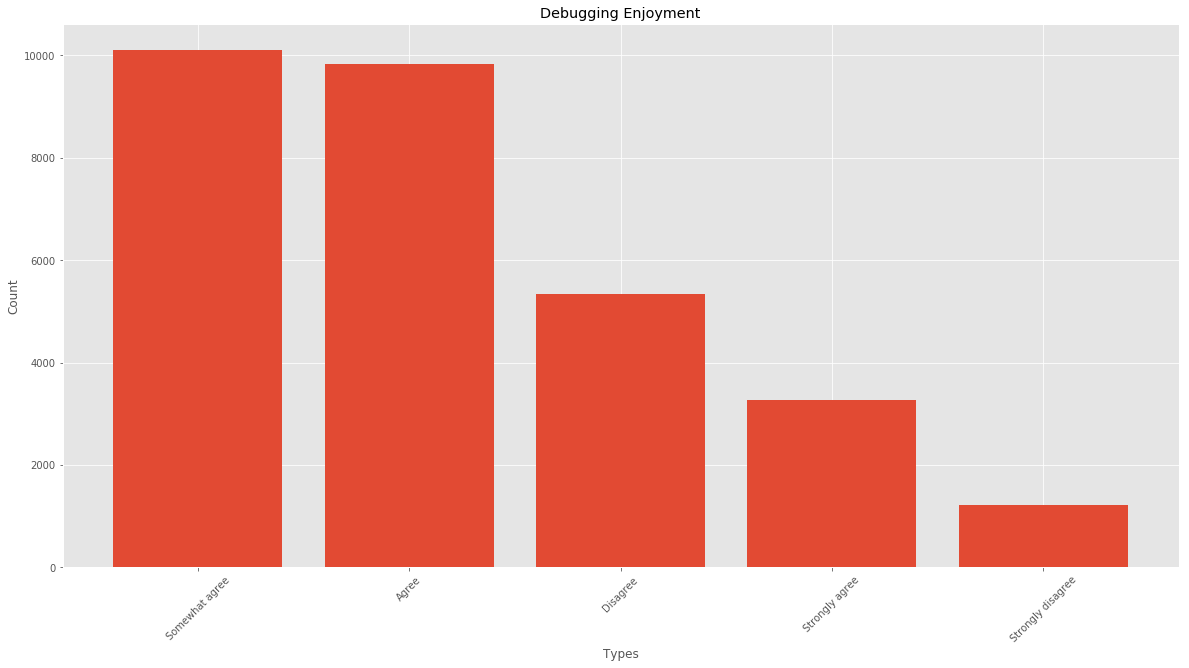

In [37]:
debugData = stackData['EnjoyDebugging'].dropna().value_counts()
labels = debugData.index
count = debugData.values

plt.figure(figsize=(20, 10))
plt.title('Debugging Enjoyment')
plt.xlabel('Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.bar(labels, count)
plt.show(True)

### This is only a small amount of analysis of the huge developers survey data released by StackOverflow. </br>
### Many more interesting inferences could be drawn out of the high quality features present in the data. 